In [1]:
access_token = "3905284168-beFyAbGSJcQDI2PUqGIaZ1Drr7AdYNJNmg0UGzR"
access_secret = "B7FaFaY8QQKmkhJ7myJpRKQNTNFdMJgU011IDB91ibMpS"
consumer_key = "s9nXjWDHN2p7nclB9PXsJx9rh"
consumer_secret = "FOD1fJaq62E0zUjq6qVJqMgIrlk5Ekz65GGh63YfnAwuhDiaoN"

In [2]:
from tweepy.streaming import StreamListener

In [3]:
from tweepy import API

In [4]:
from tweepy import Cursor

In [5]:
from tweepy import OAuthHandler

In [6]:
from tweepy import Stream

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
%pylab
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [10]:
from textblob import TextBlob

In [11]:
import re

In [12]:
class TwitterClient():
    def __init__(self, twitter_user = None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        
        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client
        
        
    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline,id = self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id = self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list
        print()
    
    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id = self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
        

In [13]:
class TwitterAuthenticator():
    def authenticate_twitter_app(self):
        auth = OAuthHandler(consumer_key,consumer_secret)
        auth.set_access_token(access_token,access_secret)
        return auth
        

In [14]:
class TwitterStreamer():
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()
    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        listener = TwitterListener()
        
        stream = Stream(auth,listener)

        stream.filter(track = hash_tag_list)

    
    

In [15]:
class TwitterListener(StreamListener):
    def __init__(self,fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename
    
    def on_data(self,data):
        try:
            print(data)
            with open(self.fetched_tweets_filename,'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on the data: %s" %str(e))
        return True
    
    def on_error(self,status):
        if status == 420:
            return False
        print(status)
        
        

In [16]:
class TweetAnalyzer():
    def clean_tweet(self, tweet):
         return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    
    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
    
    def tweets_to_dataframe(self,tweets):
        df = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['tweets'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweet'] = np.array([tweet.retweet_count for tweet in tweets])
        return df

                                              tweets                   id  \
0  गर्मि भयोभने त स्कूलहरु बन्द गर्ने होइन| वरिपर...  1140471071453278209   
1  ९२,००० नेपाली कोरियाको परिक्षया दिन तयार| देशम...  1137328054764593153   
2  सामन्ती वर्गको मात्र प्रवेश सरकारी निकायमा भन्...  1137284070847598592   
3  लिम्बु, राई, मगर दौडे ब्रिटिश लाहुरे भए, मारवा...  1137284068414959616   
4  ए किसान, तिमीले मौसमै पिच्छे रोप्ने बोटबिरुवाक...  1136180609431220225   
5  May the auspicious occasion of Eid bless you w...  1136109297090215937   
6  पढ केटा हो पढ, केटिले नम्बर देलान, मास्टरले दि...  1135868003566776320   
7  RT @sabeenakarki: “छोरीमान्छेहरु सानो-सानो\nकु...  1135434408675033088   
8  बृद्दभत्ता बाडदा सयम अपनाउनु पर्छ| कतै गरिब जन...  1135431229765967874   
9  कडा| अब यसै गरौ| राम्रो आयो भने नेपालीले सुनको...  1135002698422468614   

                 date              source  likes  retweet  Sentiments  
0 2019-06-17 04:07:47  Twitter Web Client      0        0           0  
1 2019-0

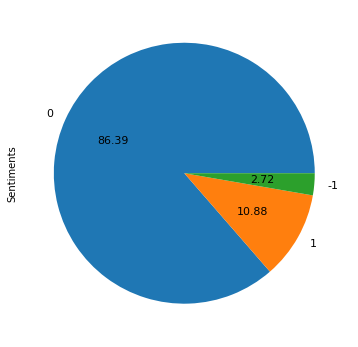

In [17]:
if __name__ == "__main__":
    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()
    
    tweets = api.user_timeline(screen_name = 'Diccewt',count = 400)
    df = tweet_analyzer.tweets_to_dataframe(tweets)
    
    
    df['Sentiments'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])
    
    print(df.head(10))
    sentiments = []
    for sentiment in df['Sentiments']:
        if sentiment not in sentiments:
            sentiments.append(sentiment)
            
    print("Creation of content sources:")
    for sentiment in sentiments:
        print("* {}".format(sentiment))

        
    percent = np.zeros(len(sentiments))

    for sentiment in df['Sentiments']:
        for index in range(len(sentiments)):
            if sentiment == sentiments[index]:
                percent[index] += 1
                pass

    percent /= 100

# Pie chart:
    pie_chart = pd.Series(percent, index=sentiments, name='Sentiments')
    pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))
  